### **Tesla Stock Prices analysis by Lucio Awa**

#### Source of data: [Kaggle](https://www.kaggle.com/datasets/varpit94/tesla-stock-data-updated-till-28jun2021)

#### Programs used:

- SQL
- Python with Pandas
- Matplotlib + Seaborn
- PyGWalker 

### **II**. **Queries on Tesla's stock data from 6/29/10 to 3/24/22**

#### Columns in Tesla's stock csv file:
- Date
- Open
- High
- Low
- Close
- Adjustment Close
- Volume

#### Queries:

1. Basic Summary Statistics
2. Yearly Average Closing Prices
3. Highest Volume in a day with corresponding Maximum Volume for each year
4. 10-day moving average of closing prices around Tesla's Highest Volume day
5. Days with Significant Price Change around Tesla's Highest Volume day
6. Yearly Low and High range of Tesla's stock prices
7. Volume and Close Price Correlation

#### Format of analysis for each query:

- SQL query
- Python with Pandas dataframe
- Matplotlib + Seaborn Visualization
- PyGWalker - Tableau-style UI for visual analysis
- Insights gained about Tesla's stock

**____________________________________________________________________________________________________________________________________________________**

### **Query 1. Basic Summary Statistics**

### SQL Query:

This query calculates and retrieves summary statistics for the 'Close' prices of Tesla stock from the Tesla_Stock_Prices   
table in USD, limiting the results to only two decimal points.  

* **SELECT**  
    * **ROUND(MIN(Close),2) AS Min_Close,** -- Minimum value of 'close' column  
    * **ROUND(MAX(Close), 2) AS Max_Close,** -- Maximum value of 'close' column  
    * **ROUND(AVG(Close), 2) AS Avg_Close,** -- Average (mean) value of 'close' column  
    * **ROUND(STDDEV(Close), 2) AS Std_Dev_Close** -- Standard deviation  value of 'close' column, a measure of how spread out   
    the closing prices are from the average   
* **FROM Tesla_Stock_Prices;** - - Data retrieved from this specific table  

### Python with Pandas

Min Close: 3.16
Max Close: 1229.91
Avg Close: 138.76
Std Dev Close: 250.12


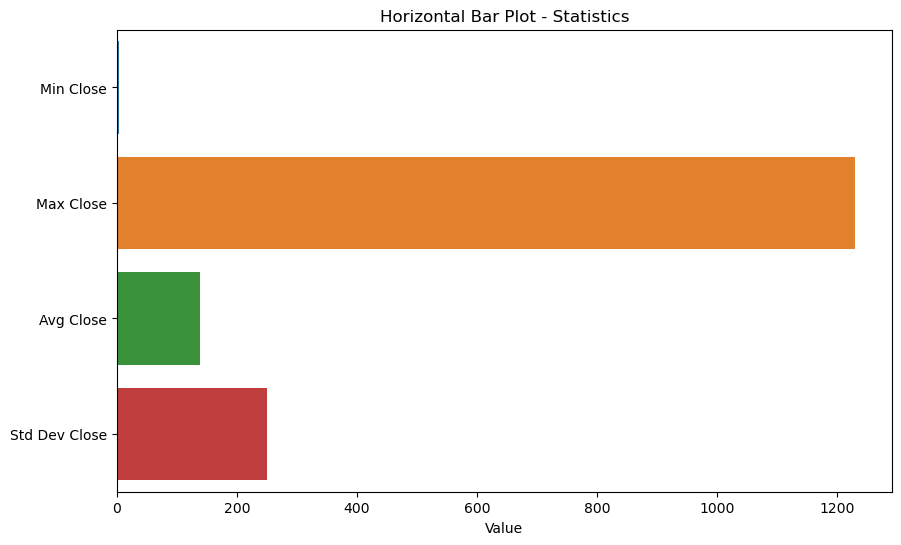

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
s
# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

min_close = df['Close'].min()
max_close = df['Close'].max()
avg_close = df['Close'].mean()
std_dev_close = df['Close'].std()

# Define stat_labels and stat_values
stat_labels = ['Min Close', 'Max Close', 'Avg Close', 'Std Dev Close']
stat_values = [min_close, max_close, avg_close, std_dev_close]

# Print the statistics
print(f"Min Close: {min_close:.2f}")
print(f"Max Close: {max_close:.2f}")
print(f"Avg Close: {avg_close:.2f}")
print(f"Std Dev Close: {std_dev_close:.2f}")

# Horizontal Bar Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=stat_values, y=stat_labels, orient='h')
plt.title('Horizontal Bar Plot - Statistics')
plt.xlabel('Value')
plt.show()


In [15]:
# Basic Summary Statistics using PyGWalker

#Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-6" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

### Query 1: Insights from Basic Summary Statistics

**1. Significant Price Range:** Tesla's stock has experienced both substantial growth and volatility.

**2. Long-Term Growth:** From $3.16 to $1229.91, it indicates a significant long-term growth in the value of the company.   
Investors who held Tesla stock from the start of the period would have seen substantial appreciation in their   
investments.

**3. Volatility:** The wide range between the minimum and maximum prices indicates that Tesla's stock is characterized by   
significant volatility. Such volatility can present both opportunities and risks for investors. It suggests that the   
stock has experienced periods of rapid price changes, which could be influenced by various market factors, news, and   
company developments.

**4. Market Sentiment and External Factors:** The price fluctuations may reflect changes in market sentiment, investor   
perceptions, macroeconomic conditions, and other external factors that impact Tesla's stock. The company's performance,   
product launches, earnings reports, regulatory news, and technological advancements may have contributed to these   
fluctuations.

**5. Investor Behavior:** The large price range suggests that Tesla's stock has attracted a diverse range of investors,   
including those seeking short-term trading opportunities and those with a long-term investment perspective. Different   
investors may have reacted differently to news and events, contributing to the price volatility.

**6. Potential for Gains and Losses:** The wide range of prices implies that there have been opportunities for investors to   
make significant gains or losses depending on their timing of buying and selling. Traders and investors who correctly   
predicted market trends could have profited from these price movements.

**7. Historical Context:** Consider comparing the stock's price movements to significant events in the company's history,   
such as product launches, earnings announcements, and industry trends. This can help provide a contextual understanding   
of why certain price movements occurred.

**8. Risk Management:** Investors and analysts need to be aware of the potential risks associated with such price volatility.   
Volatile stocks can pose challenges for risk management and require careful evaluation and diversification strategies.

**9. Average Closing Price (Avg_Close):** The average closing price of $138.76 represents the typical value of Tesla's stock   
price over the dataset's time period. It provides a general overview of the stock's performance and trend. Keep in mind   
that the average can be influenced by extreme values (outliers) in the data.

**10. Standard Deviation of Closing Price (Std_Dev_Close):** The standard deviation of $250.12 indicates the amount of   
variability or dispersion in Tesla's closing stock prices. A higher standard deviation suggests that the closing prices   
have fluctuated significantly from the average. In other words, the stock prices have experienced relatively large   
deviations from the mean, which may indicate higher volatility in the stock. The stock has experienced periods of both   
increased gains and losses.

**__________________________________________________________________________________________________________________________________________________**  

### **Query 2. Yearly Average Closing Prices:**

### SQL Query:

This query performs an analysis on the Tesla stock data, from 6/29/10 to 3/24/22, to calculate the average closing price       
for each year.

* **SELECT**
    * **DATE_TRUNC('year', Date) AS Year,** -- The ‘DATE_TRUNC’ function truncates the ‘Date’ to a level of precision, in  
    this case to the ‘year’ level. The result is displayed as a new column named ‘Year’’ in the output.  
    * **ROUND(AVG(Close), 2) AS Avg_Close** -- The average closing price for all rows within each truncated year, rounded  
    to 2 decimals. The result is displayed as a new column named Avg_Close in the output.
* **FROM Tesla_Stock_Prices**
* **GROUP BY Year** -- Groups the data by the ‘Year’ column created using ‘DATE_TRUNC’. This is essential when you want to   
    aggregate data (e.g., calculate averages) for distinct groups.  
* **ORDER BY Year;** -- Sorts the results in ascending order based on the ‘Year’ column. This ensures that the output  
    displays the results in chronological order.

### Python with Pandas:

    Year  Avg_Close
0   2010       4.67
1   2011       5.36
2   2012       6.23
3   2013      20.88
4   2014      44.67
5   2015      46.01
6   2016      41.95
7   2017      62.86
8   2018      63.46
9   2019      54.71
10  2020     290.00
11  2021     779.99
12  2022     922.09


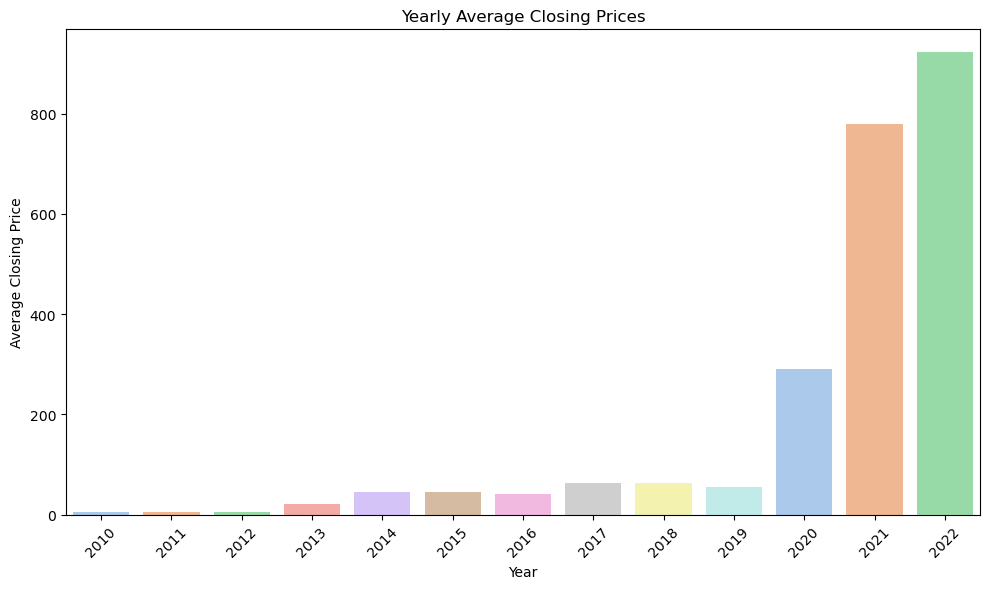

In [5]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Add a new column 'Year' by truncating the 'Date' to the year level
df['Year'] = df['Date'].dt.year

# Calculate the yearly average closing prices and round to 2 decimal places
yearly_avg_close = df.groupby('Year')['Close'].mean().round(2)

# Create a new DataFrame to store the results
yearly_avg_df = pd.DataFrame({'Year': yearly_avg_close.index, 'Avg_Close': yearly_avg_close.values})

# Print the DataFrame with yearly average closing prices
print(yearly_avg_df)

# Create a Seaborn visualization
# The visualization is a bar plot with years on the x-axis and average closing prices on the y-axis, which should 
# provide a clear representation of the yearly trends in average closing prices.

plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='Avg_Close', data=yearly_avg_df, palette='pastel')
plt.title('Yearly Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
# Yearly Average Per Year using PyGWalker

#Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-7" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

### Query 2: Inshights from Yearly Average Closing Prices

**1. Early Growth Phase (2010-2013):** During the initial years from 2010 to 2013, Tesla's stock averaged relatively   
low closing prices, gradually increasing over the years. This suggests a period of early growth and development for   
the company.

**2. Rapid Growth and Expansion (2014-2017):** From 2014 to 2017, there was a substantial increase in the average  
closing price, indicating a period of rapid growth and expansion for Tesla. This could be attributed to successful   
product launches, increased demand, and positive market sentiment.

**3. Stabilization (2018-2019):** The average closing price remained relatively stable from 2018 to 2019. This could   
indicate a period of consolidation and market maturity as the company worked to maintain its position and manage   
investor expectations.

**4. Explosive Growth (2020-2021):** The years 2020 and 2021 saw a remarkable surge in the average closing price, with    
an exponential increase in value. This period corresponds to significant milestones, such as Tesla's inclusion in the  
S&P 500 index, continued growth in electric vehicle adoption, and high investor enthusiasm.

**5. Continued Strong Performance (2022):** The average closing price in 2022 remains notably high, demonstrating that   
Tesla's stock has maintained a strong performance and investor interest.

**6. Market Sentiment and Events:** The fluctuations in average closing prices across the years suggest that market     
sentiment and external events have played a significant role in driving Tesla's stock performance. Positive news,   
product launches, financial results, and technological advancements likely influenced these fluctuations.

**7. Investor Behavior:** The considerable variations in average closing prices from year to year reflect changes in   
investor behavior, sentiment, and expectations. The years of explosive growth indicate periods of high investor   
optimism and demand.

**8. Volatility and Risk:** The wide range of average closing prices over the years indicates that Tesla's stock has   
experienced considerable volatility. While this volatility presents opportunities for gains, it also poses risks for   
investors due to potential rapid price swings.

**9. Long-Term Growth Trend:** Despite short-term fluctuations, the general trend suggests that Tesla's stock has   
experienced long-term growth since its inception, with particularly notable periods of acceleration.

**__________________________________________________________________________________________________________________________________________________**

### **Query 3. Highest Volume in a day with corresponding Maximum Volume for each year**

#### SQL Query:

The SQL query uses a CTE (Common Table Expression) to calculate the rank of trading volumes within each year and then   
selects the rows where the rank is 1, indicating the days with the highest trading volume for each year. The results   
include the year, date, and corresponding volume.

* **WITH RankedByVolume AS (**
    * **SELECT**  
            * **Date,** -- Selects the trading date    
            * **EXTRACT(YEAR FROM Date) AS Year,** -- Extracts the year from the date and assigns it as the 'Year' column    
            * **Volume,** -- Selects the trading volume for that date    
            * **RANK() OVER (PARTITION BY EXTRACT(YEAR FROM Date) ORDER BY Volume DESC) AS VolumeRank** -- Calculates the     
                rank of each day's volume within the same year    
    * **FROM Tesla_Stock_Prices**  
* **)**   
* **SELECT**   
        * **Year,** -- The year extracted from the date    
        * **Date AS Highest_Volume_Day,** -- The trading date itself    
        * **Volume AS Max_Volume** -- The trading volume for that day    
* **FROM RankedByVolume**  
* **WHERE VolumeRank = 1** -- Filter the results to include only rows where the 'VolumeRank' is equal to 1, corresponding     
    to the highest trading volume for each year  
* **ORDER BY Year** -- Orders results by the 'Year' column in ascending order

### Python with Pandas:

      Year       Date     Volume
0     2010 2010-06-29   93831500
191   2011 2011-03-31   57589000
566   2012 2012-09-25   28402000
723   2013 2013-05-14  185819500
920   2014 2014-02-25  163408500
1164  2015 2015-02-12   78248000
1506  2016 2016-06-22  118712000
1851  2017 2017-11-02   98957000
2078  2018 2018-09-28  168248500
2348  2019 2019-10-25  150030500
2416  2020 2020-02-04  304694000
2689  2021 2021-03-05   89396500
2913  2022 2022-01-24   50521900


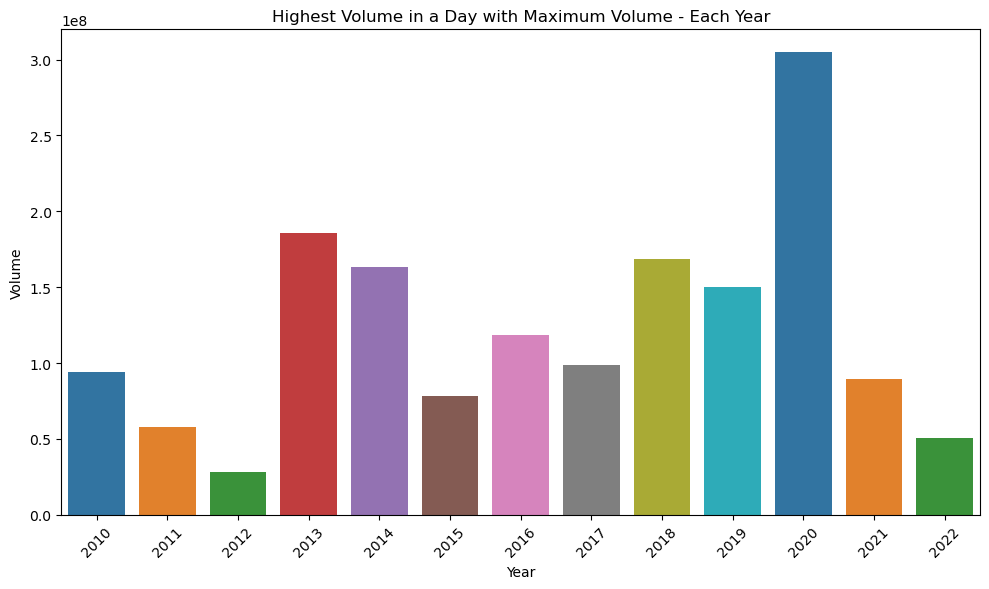

In [4]:
# Imports necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a Common Table Expression (CTE) named 'RankedByVolume'
ranked_by_volume = (
    df.assign(Year=df['Date'].dt.year)
    .sort_values(by=['Year', 'Volume'], ascending=[True, False])
    .assign(VolumeRank=lambda x: x.groupby('Year').cumcount() + 1)
    .query('VolumeRank == 1')
    [['Year', 'Date', 'Volume']]
)

# Print the DataFrame with highest volume days and maximum volumes
print(ranked_by_volume)

# Create a Seaborn visualization
plt.figure(figsize=(10, 6))

# Generate a color palette with a different color for each bar
colors = sns.color_palette("tab10", n_colors=len(ranked_by_volume['Year'].unique()))

# Bar plot with years on the x-axis and volume on the y-axis
sns.barplot(x='Year', y='Volume', data=ranked_by_volume, palette=colors)

plt.title('Highest Volume in a Day with Maximum Volume - Each Year')
plt.xlabel('Year')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [17]:
# Highest Volume in a day with corresponding Maximum Volume for each year using PyGWalker

#Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-8" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

### Query 3: Insights for Highest Volume in a day with Maximum Volume for each year

The following results are shown in the context of some of the main global financial events from 2010 to 2022, along   
with Elon’s Tesla and his other companies’ main financial events. These results provide insights into how these   
events might have influenced Tesla's stock trading activity. 

##### Results divided into: 

- Query results
- Global financial event
- Tesla related event
- Relation


The observed patterns of maximum trading volume for Tesla's stock on specific dates and in particular years can be   
attributed to the interplay of global financial events, Elon Musk's companies' developments, and broader market   
dynamics.

Instances of uncertainty, market shifts, and emerging investment prospects likely fueled heightened trading activity.   
Significant announcements, milestones, and strategic decisions made by Elon Musk and his companies acted as catalysts   
for investor interest in Tesla's stock. Furthermore, the synergy between broader market sentiment, investor behavior,   
and the convergence of global financial events with specific company advancements collectively influenced the   
observed trends in maximum trading volume.

**1. June 30, 2010 - Volume: 93,831,500:**

**Global financial event:** 2010 (European Debt Crisis)

**Tesla related event:** Tesla went public on June 29, 2010, with an IPO price of $17 per share. High volume could   
have been influenced by anticipation around product developments, early investor interest, or news related to electric   
vehicle technology.

**Relation:** The European Debt Crisis caused market volatility and uncertainty globally. This environment might have   
affected investor sentiment around Tesla's IPO, potentially contributing to higher trading volume on the IPO day.


**2. March 31, 2011 - Volume: 57,589,000:**

**Global financial event:** U.S. Credit Rating Downgrade - Standard & Poor's downgraded the United States' credit   
rating from AAA to AA+, citing concerns about the U.S. government's ability to manage its debt.

**Tesla related event:** Tesla continued to develop electric vehicles, potentially driving interest and trading volume.

**Relation:** The U.S. Credit Rating Downgrade event likely had broader implications for market sentiment, causing   
investors to seek opportunities in innovative sectors that could weather economic challenges. Tesla's focus on   
electric vehicles aligned with long-term sustainability goals, and its progress in this area could have provided a   
counterbalance to the uncertainty caused by the credit rating downgrade. As investors sought avenues for potential   
growth amidst market turbulence, Tesla's electric vehicle development could have garnered attention and contributed   
to the observed trading volume on March 31, 2011.


**3. September 25, 2012 - Volume: 28,402,000:**

**Global financial event:** European Central Bank's Outright Monetary Transactions (OMT) - The ECB announced its plan   
to potentially buy unlimited amounts of sovereign debt from struggling eurozone countries to stabilize their bond   
markets.

**Tesla related event:** Dragon's First Commercial Resupply Mission: In May 2012, SpaceX's Dragon spacecraft became the   
first commercial spacecraft to deliver cargo to the International Space Station (ISS), marking a significant milestone   
for commercial spaceflight.

**Relation:** The European Central Bank's OMT announcement could have contributed to a broader sense of optimism in   
financial markets, especially regarding potential solutions to the eurozone crisis. Investors may have been more open   
to considering innovative and forward-looking investments, such as those associated with companies like Tesla and   
SpaceX, which represented disruptive technologies and commercial space endeavors. The success of SpaceX's Dragon   
mission highlighted the advancements in private spaceflight and contributed to the perception of SpaceX as a   
trailblazer in the aerospace industry. This positive sentiment, coupled with the broader market context, might have   
influenced trading activity and contributed to the observed trading volume on September 25, 2012.


**4. May 14, 2013 - Volume: 185,819,500:**

**Global financial event:** Taper Tantrum - The U.S. Federal Reserve announced its intention to reduce its bond-buying   
program, leading to a surge in global interest rates and volatility in emerging markets.

**Tesla related event:** First Profitable Quarter. Tesla reported its first-ever profitable quarter in Q1 2013, a   
milestone that was seen as a turning point for the company's financial viability.

**Relation:** The Taper Tantrum had widespread effects on financial markets, with investors seeking safe havens and   
reevaluating their investment strategies. Against this backdrop, Tesla's announcement of a profitable quarter could   
have been interpreted as a beacon of stability and resilience amid market turbulence. The achievement of profitability   
demonstrated that Tesla's business model was maturing and had the potential to weather economic uncertainties. This   
positive news could have attracted increased investor attention and contributed to the observed trading volume on May   
14, 2013. The contrasting narratives of market volatility and Tesla's financial success might have created a scenario   
where investors sought out companies that exhibited signs of strength and growth, influencing the trading activity of   
Tesla's stock.


**5. February 25, 2014 - Volume: 163,408,500:**

**Global financial event:** Oil Price Collapse - The price of oil plummeted from around $100 per barrel to below $50   
per barrel, due to factors like oversupply and weak global demand.

**Tesla related event:** Gigafactory Announcement: In February 2014, Tesla announced plans to build a Gigafactory, a   
massive battery production facility aimed at reducing the cost of batteries and enabling mass production of electric   
vehicles.

**Relation:** The Oil Price Collapse had broader implications for market sentiment, with investors reevaluating sectors   
affected by oil prices. In this context, Tesla's announcement of the Gigafactory may have been perceived as a strategic   
move to secure the company's supply chain and long-term growth prospects, regardless of energy market fluctuations.   
Tesla's plans to reduce battery costs and enable mass EV production aligned with sustainability and innovation trends,   
potentially making it an attractive investment opportunity amidst concerns about traditional energy markets. The   
combination of the oil price collapse and Tesla's innovative plans could have led to increased investor attention and   
trading activity on February 25, 2014. The positive narrative around Tesla's future growth and the company's strategic   
decisions could have stood out in a market environment influenced by energy sector challenges.


**6. February 12, 2015 - Volume: 78,248,000:**

**Global financial event:** Chinese Stock Market Crash - The Chinese stock market experienced a major crash, with the   
Shanghai Composite Index losing around 30% of its value in a short period, prompting government interventions to   
stabilize the market.

**Tesla related event:** Tesla made a big push into energy when it unveiled the Powerpack and Powerwall at an event in   
Hawthorne, California.

**Relation:** The Chinese Stock Market Crash created global market volatility and prompted investors to reassess their   
exposure to riskier assets. Against this backdrop, Tesla's announcement of its Powerpack and Powerwall signaled a   
strategic expansion into the energy sector, potentially appealing to investors seeking resilient and innovative   
companies. Tesla's move into energy storage aligned with global sustainability trends and diversification away   
from traditional energy sources. This expansion might have garnered increased attention from investors looking for   
companies positioned to address emerging challenges in energy and environmental sustainability. The combination of   
global market concerns and Tesla's innovative energy solutions could have influenced trading activity and   
contributed to the observed trading volume on February 12, 2015.


**7. June 22, 2016 - Volume: 118,712,000:**

**Global financial event:** Brexit Referendum - The United Kingdom voted to leave the European Union, causing   
significant uncertainty in financial markets and impacting the value of the British pound.

**Tesla related event:** In 2016, Tesla became the world's first vertically-integrated sustainable energy company with   
the acquisition of SolarCity, the leading provider of solar power systems in the United States.

**Relation:** The Brexit Referendum triggered uncertainty and volatility in global financial markets, with investors   
seeking stability amidst geopolitical developments. In this context, Tesla's acquisition of SolarCity could have   
been perceived as a move to strengthen the company's long-term sustainability initiatives, offering an opportunity   
for investors to engage with a company at the forefront of both electric vehicles and renewable energy. Tesla's   
integrated approach resonated with global trends towards environmental responsibility and energy independence. The   
combination of a tumultuous global event like Brexit and Tesla's strategic expansion could have attracted heightened   
investor attention and contributed to the observed trading volume on June 22, 2016. The contrasting narratives of   
geopolitical uncertainty and Tesla's expansion into renewable energy might have influenced trading activity by   
offering investors an avenue for potential growth and alignment with sustainable values.


**8. November 2, 2017 - Volume: 98,957,000.00:**

**Global financial event:** Bitcoin Rally - The price of Bitcoin and other cryptocurrencies experienced a dramatic   
surge, attracting widespread attention and speculation in the market.

**Tesla related event:** The successful launch and landing of the Falcon Heavy rocket by SpaceX. Its maiden flight  
took place on February 6, 2018, but the development and preparations for the launch occurred throughout 2017.

**Relation:** The Bitcoin Rally drew attention from investors and the media, reflecting the growing interest in   
alternative forms of investment and financial technology innovation. Against this backdrop, SpaceX's achievement   
in launching and landing the Falcon Heavy rocket highlighted the potential for private companies to reshape the   
aerospace sector. These events showcased disruptive technological advancements that could have attracted investors   
looking for transformative opportunities beyond traditional markets. The Bitcoin Rally's association with   
technology-driven financial speculation and the Falcon Heavy's demonstration of SpaceX's pioneering spirit could   
have created a scenario where investors sought exposure to innovative companies like Tesla. The combination of these   
narratives could have contributed to the observed trading volume on November 2, 2017, as investors looked for   
opportunities in emerging technologies and industries.Pre-US-China Trade War could have influenced Tesla's   
international operations and investor sentiment.


**9. September 28, 2018 - Volume: 168,248,500.00:**

**Global financial event:** Trade War - The United States and China engaged in a series of tit-for-tat tariff     
announcements, sparking fears of a global trade war and affecting international trade and supply chains.

**Tesla related event:** Tesla was added to the S&P 500 index, further solidifying its status as a major player   
in the stock market.

**Relation:** The Trade War between the United States and China had far-reaching implications for international   
trade and investment. The uncertainty generated by the trade tensions prompted investors to reassess their   
portfolios and seek stability. In contrast, Tesla's inclusion in the S&P 500 index highlighted the company's   
growth trajectory and market influence. The addition to the index represented a vote of confidence in Tesla's   
long-term prospects and positioned the company as a substantial player in the stock market. Amidst concerns   
about global trade disruptions, Tesla's presence in the S&P 500 could have been perceived as a resilient   
investment option with potential for consistent growth. The combination of trade tensions and Tesla's   
recognition as a significant market player could have contributed to heightened trading activity on September   
28, 2018, as investors evaluated opportunities in the context of evolving global economic dynamics.


**10. October 25, 2019 - Volume: 150,030,500.00:**

**Global financial event:** Repo Market Turmoil - The U.S. repurchase agreement (repo) market experienced a   
liquidity squeeze, leading to a spike in short-term interest rates and prompting interventions by the Federal   
Reserve to stabilize the market.

**Tesla related event:** Further developments related to Tesla's electric vehicles and energy products.

**Relation:** The Repo Market Turmoil signaled potential vulnerabilities in short-term funding markets and   
underscored the importance of central bank interventions to maintain financial stability. Amidst these concerns,   
Tesla's ongoing developments in electric vehicles and energy products could have presented a counter-narrative   
of innovation and resilience. As the automotive industry faced challenges related to sustainable mobility, Tesla's   
advancements might have resonated with investors seeking exposure to companies driving technological disruption and   
environmental sustainability. The contrast between market turbulence and Tesla's trajectory as a technology-driven   
company could have attracted trading activity on October 25, 2019. Investors looking for opportunities in sectors       
poised for transformation might have viewed Tesla as a compelling option, given its role in reshaping 
transportation   
and energy systems for the future.


**11. February 4, 2020 - Volume: 304,694,000.00:**

**Global financial event:** COVID-19 Pandemic - The global pandemic caused by the spread of the novel coronavirus led   
to widespread lockdowns, economic disruptions, and financial market volatility.

**Tesla related event:** Tesla disclosed a $1.5 billion investment in Bitcoin.

**Relation:** The COVID-19 Pandemic triggered a period of unprecedented market turmoil and uncertainty. As economies   
grappled with the effects of lockdowns and the potential long-term impacts of the pandemic, investors sought safe   
havens and assets with potential for value preservation. In this context, Tesla's disclosure of a significant   
Bitcoin investment could have added a layer of complexity to its financial strategy. The move could have been   
perceived as an attempt to diversify assets or capitalize on potential opportunities in the cryptocurrency space.   
The contrast between the global health crisis and Tesla's exploration of unconventional investment avenues could   
have attracted investor attention on February 4, 2020. Investors navigating the uncertainties of the pandemic might   
have viewed Tesla's strategic decisions as a reflection of its forward-looking approach and ability to adapt to   
changing market dynamics. The combination of these narratives could have contributed to the observed trading   
volume, as investors evaluated Tesla's potential resilience and growth prospects amidst a complex and rapidly   
evolving global environment.


**12. March 5, 2021 - Volume: 89,396,500.00:**

**Global financial event:** GameStop Short Squeeze - Retail investors organized through online forums like Reddit's   
WallStreetBets drove up the stock price of GameStop and other heavily shorted companies, causing major losses for   
some hedge funds.

**Tesla related event:** On January 7, 2021, Elon Musk's ascent to becoming the wealthiest person in the world,   
according to Bloomberg, underscored the impact of his achievements across Tesla and other ventures. His wealth   
ranking highlighted his influential role in shaping industries such as electric vehicles, space travel, and   
technology.

**Relation:** The GameStop Short Squeeze symbolized the power of retail investors to disrupt traditional market   
dynamics and challenge established financial institutions. The collective action of online communities demonstrated   
the potential for retail investors to influence stock prices and market sentiment, particularly for companies with   
high short interest. Against this backdrop, Elon Musk's rise to the position of the world's wealthiest person   
exemplified the influence of visionary leaders in shaping markets and industries. As the founder and leader of Tesla,   
his achievements and strategic decisions were closely tied to the company's stock performance. The convergence of   
these events could have prompted investors to consider the evolving landscape of financial markets, where individual   
actions and charismatic leadership could impact market dynamics. Investors might have assessed the implications of   
retail investor movements on Tesla's stock and its founder's position in the financial world. The combination of   
these narratives could have contributed to the observed trading volume on March 5, 2021, as investors navigated the   
intersection of individual-driven market forces and established market norms.


**January 24, 2022 - Volume: 50,521,900.00:**

**Global Financial Event:** Inflation Concerns - Rising inflation became a significant concern in many economies, as   
central banks grappled with the challenge of balancing economic growth and price stability.

**Tesla related event:** Musk acquires social media company Twitter in a $44 billion deal. His acquisition of Twitter    
marked a significant departure from his primary ventures in technology, electric vehicles, and space exploration.   
The acquisition underscored Musk's diverse interests and strategic vision for expanding his influence across various   
industries.

**Relation:** The concern over rising inflation represented a broader economic challenge that had implications for   
financial markets and investment decisions. Investors closely monitored central bank policies and economic indicators   
to gauge the potential impact of inflation on asset values and purchasing power. Amidst these discussions, Elon Musk's   
acquisition of Twitter signaled his interest in broader spheres beyond his well-known technological ventures. The   
acquisition might have raised questions about Musk's intentions and strategic objectives, potentially leading investors   
to assess the implications of this move on his broader business portfolio. The intersection of concerns over inflation   
and Musk's expansion into social media could have prompted investors to evaluate the resilience of Tesla's stock in the   
context of evolving economic dynamics and the founder's diverse interests. The combination of these narratives could   
have contributed to the observed trading volume on January 24, 2022, as investors considered the potential impact of   
macroeconomic trends and the implications of Musk's strategic decisions on Tesla's future prospects.

**__________________________________________________________________________________________________________________________________________________**

### **Query 4. 10-day moving average of closing prices around Tesla's Highest Volume day**

### SQL Query: 

The 10-day moving average is a commonly used technical analysis tool in finance to smooth out price data   
over a 10-day period and provide a clearer picture of the underlying trend. 

This query provides 10 rows as a result around the date 2020-02-04, which is the highest volume day in Tesla's 
history.  
These results are used to identify short-term trends and potential reversal points.

* **SELECT** -- Selects specific columns to display in the query result.  
    * **Date,** -- date of the stock price data
    * **ROUND(Close, 2) AS Close,** -- rounds results to 2 decimal places. represents closing price of  
        Tesla’s stock on that date and renames column as ‘close’
    * **ROUND(AVG(Close) OVER (ORDER BY Date ROWS BETWEEN 9 PRECEDING AND CURRENT ROW), 2)   
        AS Moving_Avg_10_Days** -- This part rounds to 2 decimal places and calculates the moving average   
        of the ‘Close’ prices over a window of 10 days (including the current day) for each row.  
        -- ‘AVG(Close)’ calculates the average of the ‘close’ prices within the specified window ‘OVER’   
        Indicates that the following aggregation function (AVG in this case) will be applied to a window   
        of rows.   
        -- ORDER BY Date: Specifies that the window should be ordered by the ‘Date’ column.  
        -- ROWS BETWEEN 9 PRECEDING AND CURRENT ROW: Defines the range of rows to be included in the window.   
        It includes the 9 preceding rows and the current row, resulting in a total of 10 rows in the window.   
        This corresponds to the 10-day moving average.  
        -- AS Moving_Avg_10_Days: This renames the calculated moving average  
* **FROM Tesla_Stock_Prices** -- This indicates the source table from which we are retrieving data  
* **WHERE Date BETWEEN '2020-01-25' AND '2020-02-08'** -- Adjust the date range around 2020-02-04   
    (from 2020-01-25 to 2020-02-08). This ensures that the 10 rows include the 10 days around the specified   
    date.  
* **ORDER BY Date;** -- This specifies that the result should be ordered by the ‘date’ column in ascending   
    order.

### Python with Pandas: 

           Date   Close  Moving_Avg_10_Days
2410 2020-01-27  111.60              111.60
2411 2020-01-28  113.38              112.49
2412 2020-01-29  116.20              113.73
2413 2020-01-30  128.16              117.34
2414 2020-01-31  130.11              119.89
2415 2020-02-03  156.00              125.91
2416 2020-02-04  177.41              133.27
2417 2020-02-05  146.94              134.98
2418 2020-02-06  149.79              136.62
2419 2020-02-07  149.61              137.92


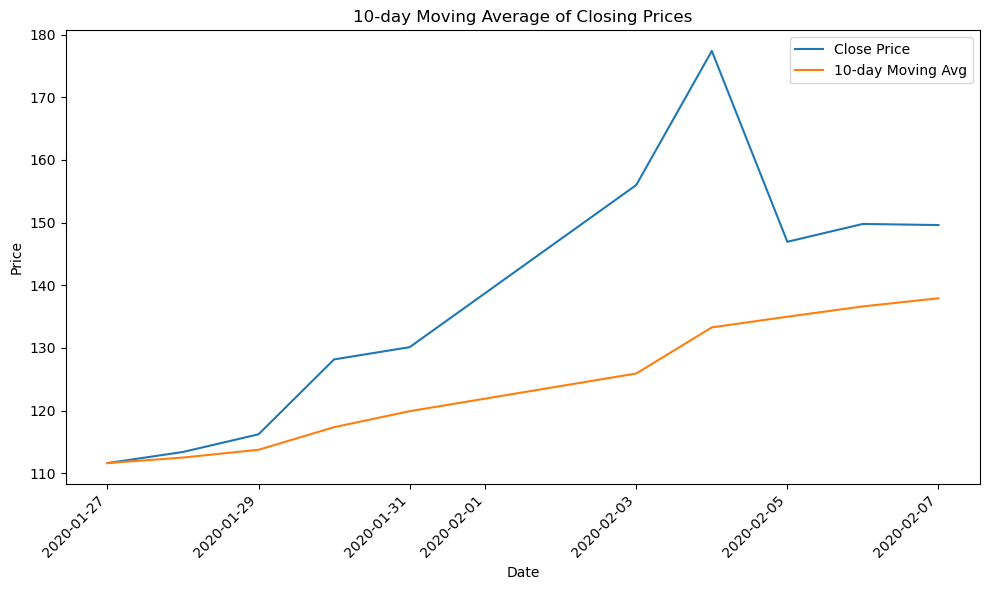

In [2]:
# Imports necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date range around 2020-02-04
start_date = '2020-01-25'
end_date = '2020-02-08'
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the DataFrame to include only rows within the date range
filtered_df = df[df['Date'].isin(date_range)].copy()  # Use .copy() to avoid the warning

# Calculate the 10-day moving average using rolling and mean functions
filtered_df['Moving_Avg_10_Days'] = filtered_df['Close'].rolling(window=10, min_periods=1).mean().round(2)

# Round the 'Close' column to 2 decimal places
filtered_df['Close'] = filtered_df['Close'].round(2)

# Select specific columns for the result
result_df = filtered_df[['Date', 'Close', 'Moving_Avg_10_Days']]

# Print the result
print(result_df)

# Create a Seaborn line plot for visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Close', data=result_df, label='Close Price')
sns.lineplot(x='Date', y='Moving_Avg_10_Days', data=result_df, label='10-day Moving Avg')
plt.title('10-day Moving Average of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')

# Rotate the x-axis labels to prevent overlap of dates
plt.xticks(rotation=45, ha='right')

plt.legend()
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [18]:
# 10-day moving average of closing prices around Tesla's Highest Volume day using PyGWalker
# results not as accurate as line plot above

#Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-9" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

### Query 4. Insights for 10-day moving average of closing prices around Tesla's Highest Volume day

This query provides insight into the short-term trend by smoothing out day-to-day fluctuations and highlighting the   
general direction of the stock's price movement.

The results of the 10-day moving average calculation around the date 2020-02-04 provide valuable insights into the   
trend of Tesla's stock prices during that period. Here are some conclusions and insights that can be drawn from the   
data:

**1. Upward Trend:** The 10-day moving average generally shows an upward trend from January 27 to February 7. This   
indicates that the average closing price of Tesla's stock increased over this period.

**2. Significant Spike:** There is a significant spike in both the closing price and the moving average on 2020-02-04.   
This corresponds to the day with the highest volume in Tesla's history. The closing price on this day was $177.41,   
significantly higher than the previous days. This could indicate a significant event or news that impacted Tesla's   
stock price and trading activity.

**3. Volatility:** The closing prices exhibit significant fluctuations throughout this period, especially around the   
date with the highest volume. This suggests that there might have been rapid shifts in investor sentiment and   
trading activity during this time.

**4. Market Response:** The increase in the 10-day moving average leading up to 2020-02-04 could indicate that market   
participants were anticipating positive developments or news related to Tesla, which could have driven up stock   
prices. The subsequent drop in the moving average after 2020-02-04 suggests a potential market response or   
correction.

**5. Trading Patterns:** The divergence between the closing price and the moving average on 2020-02-05 and 2020-02-06   
suggests potential short-term volatility or trading patterns that might have influenced market participants'   
decisions.

**6. High Volume and Price Movement:** The fact that the day with the highest trading volume in Tesla's history,   
2020-02-04, also had a significant increase in both the closing price and the moving average highlights the strong   
relationship between trading activity and price movement.

In summary, the 10-day moving average analysis provides insights into the short-term trends and dynamics of Tesla's   
stock prices around the period of the highest trading volume in its history. It suggests that a notable event or   
news on 2020-02-04 had a substantial impact on both trading activity and price movement. The moving average trend   
leading up to and following this date can provide valuable context for understanding how market participants   
responded to this event.

**__________________________________________________________________________________________________________________________________________________**

### **Query 5. Days with Significant Price Change around Tesla's Highest Volume day**

### SQL Query: 

Price change for Tesla's stock, rounding the results to 2 decimal places. The result is displayed in a   
new column named "Price_Change," showing how much the stock price changed from one day to the next, with   
the rounded value.

* **SELECT** -- select specific columns from the table  
    * **Date,** -- date of the stock price data  
    * **ROUND(Close, 2) AS Close,** -- close price rounded to 2 places renamed as Close  
    * **ROUND(Close - LAG(Close) OVER (ORDER BY Date), 2) AS Price_Change**  
        -- calculation of price change between consecutive days rounded to 2 decimals.   
        -- ‘Close’ is the current day’s closing price  
        -- ‘LAG(Close) OVER (ORDER BY Date)’ fetches the closing price of the previous day using the ‘LAG’   
        window function.  
        -- ‘Close - LAG(Close)’ calculates the price change from the previous day to the current day.  
* **FROM Tesla_Stock_Prices** -- from the Tesla table  
* **WHERE Date BETWEEN '2020-01-25' AND '2020-02-08'** -- This filters the data to focus the analysis   
    within the specified dates  
* **ORDER BY Date;** -- orders the resulting rows based on the ‘Date’ column in ascending order.

### Python with Pandas: 

           Date   Close  Price_Change
2410 2020-01-27  111.60           NaN
2411 2020-01-28  113.38          1.78
2412 2020-01-29  116.20          2.82
2413 2020-01-30  128.16         11.96
2414 2020-01-31  130.11          1.95
2415 2020-02-03  156.00         25.89
2416 2020-02-04  177.41         21.41
2417 2020-02-05  146.94        -30.47
2418 2020-02-06  149.79          2.85
2419 2020-02-07  149.61         -0.18


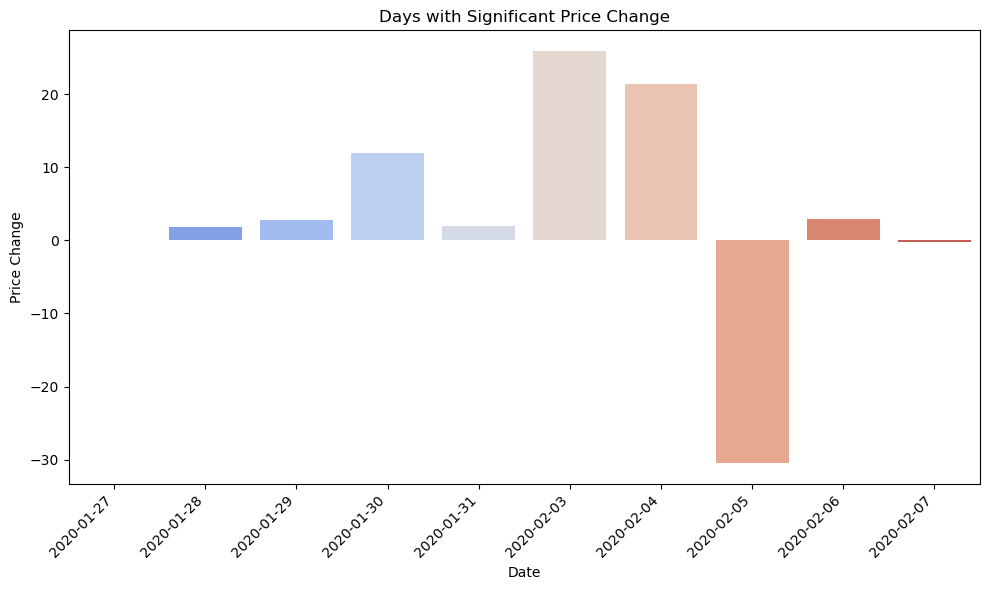

In [6]:
# Imports necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the date range
start_date = '2020-01-25'
end_date = '2020-02-08'
date_range = pd.date_range(start=start_date, end=end_date)

# Filter the DataFrame
filtered_df = df[df['Date'].isin(date_range)].copy()

# Round the 'Close' column to 2 decimal places
filtered_df['Close'] = filtered_df['Close'].round(2)

# Calculate the price change between consecutive days
filtered_df['Price_Change'] = filtered_df['Close'] - filtered_df['Close'].shift(1)
filtered_df['Price_Change'] = filtered_df['Price_Change'].round(2)

# Select specific columns for the result
result_df = filtered_df[['Date', 'Close', 'Price_Change']]

# Print the result
print(result_df)

# Create a Seaborn visualization
# In this example, I've used a bar plot from Seaborn to visualize the days with significant price changes. The 
# palette='coolwarm' parameter provides a color gradient to the bars. The x-axis labels are rotated for better 
# readability using plt.xticks(rotation=45, ha='right'), and plt.tight_layout() is used to ensure the labels are 
# displayed without clipping.
plt.figure(figsize=(10, 6))
sns.barplot(x=result_df['Date'].dt.strftime('%Y-%m-%d'), y='Price_Change', data=result_df, palette='coolwarm')
plt.title('Days with Significant Price Change')
plt.xlabel('Date')
plt.ylabel('Price Change')

# Rotate the x-axis labels
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()



In [19]:
# Days with Significant Price Change around Tesla's Highest Volume day using PyGWalker
# In this bar we can only visualize 'Close' sum not price but not the difference like using seaborn above

# Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-10" style="height: auto">\n    <head>\n        <meta http-equiv="Co…

### Query 5. Insights for Days with Significant Price Change around Tesla's Highest Volume day

Based on the provided results, we can observe the following conclusions and trends about the daily closing prices   
and the price changes between consecutive days:

**1. Increasing Trend at the Start:** The closing prices show a consistent upward trend from January 27 to January 31.   
This indicates a period of consecutive gains in the stock price.

**2. Significant Increase:** There is a notable jump in the closing price on February 3, 2020, with a price change of   
$25.89. This suggests a significant positive movement in Tesla's stock on this day.

**3. Highest Volume Day:** On February 4, 2020, the closing price experienced another substantial increase, reaching   
`$177.41`. This date also coincides with the highest trading volume day in Tesla's history. The stock price increased   
by `$21.41` compared to the previous day.

**4. Sharp Decrease:** Following the peak on February 4, there is a sharp drop in the closing price on February 5,   
resulting in a price change of -$30.47. This indicates a significant decline in Tesla's stock price.

**5. Minor Fluctuations:** In the subsequent days (February 6 and 7), the closing prices show relatively minor   
fluctuations, indicating a period of relative stability with small positive and negative changes.

Periods of both upward and downward trends in Tesla's stock prices during the specified time frame. The most   
significant price changes occurred around February 3 and February 4, with substantial increases in the stock price,   
followed by a sharp decrease on February 5. These patterns highlight the volatility and potential market sentiment   
shifts during this specific period.

**__________________________________________________________________________________________________________________________________________________**

### **Query 6. Yearly Low and High range of Tesla's stock prices**

### SQL Query: 

This SQL code extracts the year from the "date" column, calculates the minimum "low" and maximum "high" values   
for each year from 2010 to 2022, and computes the yearly price range. The results are grouped by year and ordered   
by year in ascending order.

* **SELECT** -- select specific columns from the table  
    * **EXTRACT(YEAR FROM "date") AS Year,** -- This line uses the EXTRACT function to extract the year component     
        from the "date" column. 'AS Year' assigns an alias to the result of the extraction, renaming it to "Year."        
    * **ROUND(MIN(Low), 2) AS Yearly_Low,** -- the minimum value from the ‘Low’ column rounded to 2 decimal     
        places, aliased as ‘Yearly_Low’    
    * **ROUND(MAX(High), 2) AS Yearly_High** -- the maximum value from the ‘High’ column rounded to 2 decimal     
        places, aliased as ‘Yearly_High’    
    * **(MAX("high") - MIN("low")) AS Yearly_Range** --This line calculates the yearly range by subtracting the   
        minimum "low" value from the maximum "high" value, and renames it 'Yearly_Range'.  
* **FROM Tesla_Stock_Prices** -- specifies the table from which the data is retrieved    
* **GROUP BY Year** -- groups the data by the ‘Year’ column, which is the truncated and casted date column we     
    generated earlier.    
* **ORDER BY Year;** -- orders the results based on the ‘Year’ column in ascending order  

### Python with Pandas: 

      Year  Yearly_Low  Yearly_High  Yearly_Range
0     2010        3.00         7.28          4.29
130   2011        4.22         7.00          2.78
382   2012        4.53         7.99          3.46
632   2013        6.42        38.90         32.48
884   2014       27.33        58.28         30.95
1136  2015       36.28        57.33         21.05
1388  2016       28.21        53.87         25.66
1640  2017       42.19        77.92         35.73
1891  2018       48.92        77.49         28.57
2142  2019       35.40        87.06         51.66
2394  2020       70.10       718.72        648.62
2647  2021      539.49      1243.49        704.00
2899  2022      700.00      1208.00        508.00


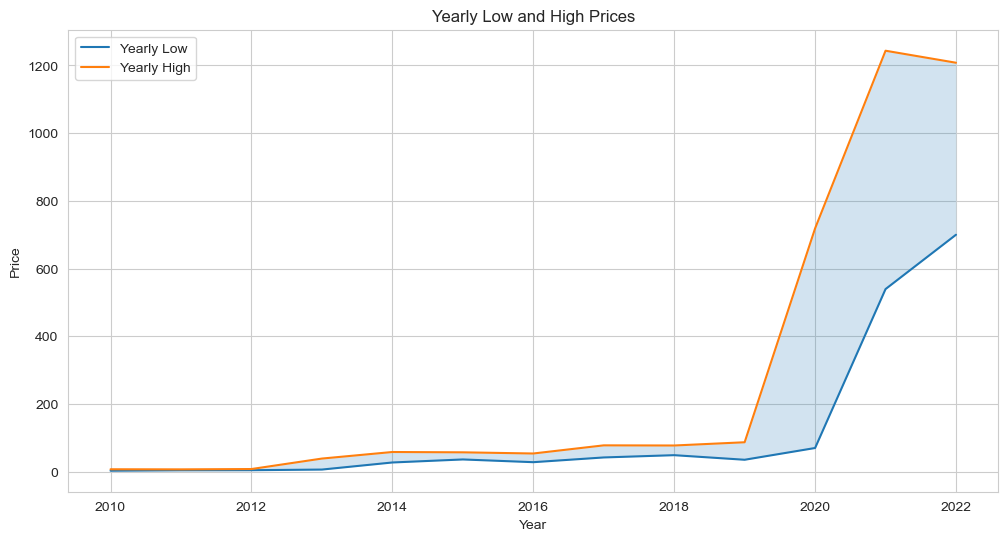

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract the year from the "Date" column and round "Low" and "High" to 2 decimal places
df['Year'] = df['Date'].dt.year
df['Yearly_Low'] = df.groupby('Year')['Low'].transform('min').round(2)
df['Yearly_High'] = df.groupby('Year')['High'].transform('max').round(2)

# Calculate Yearly_Range and round it to 2 decimal places
df['Yearly_Range'] = (df.groupby('Year')['High'].transform('max') - df.groupby('Year')['Low'].transform('min')).round(2)

# Group by Year and select unique rows
result_df = df[['Year', 'Yearly_Low', 'Yearly_High', 'Yearly_Range']].drop_duplicates().sort_values(by='Year')

# Display the results
print(result_df)

# Create a Seaborn Matplotlib visualization
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.lineplot(data=result_df, x='Year', y='Yearly_Low', label='Yearly Low')
sns.lineplot(data=result_df, x='Year', y='Yearly_High', label='Yearly High')
plt.fill_between(result_df['Year'], result_df['Yearly_Low'], result_df['Yearly_High'], alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Price')
plt.title('Yearly Low and High Prices')
plt.legend()
plt.show()

In [37]:
# Yearly Low and High range using PyGWalker
# In this UIs we can observe the min 'low' and max 'high' for each year but not the range
# nor the result are as accurate as the example above

# #Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-14" style="height: auto">\n    <head>\n        <meta http-equiv="Co…

### Query 6. Insights for Yearly Low and High range of Tesla's stock prices

**1. Early Volatility and Growth (2010-2012):** In the early years (2010-2012), Tesla's stock experienced   
relatively low yearly lows and highs. This indicates that the stock was still finding its footing in the market.   
The range gradually increased over these years, possibly reflecting growing investor interest and confidence in   
the company's prospects.

**2. Breakout and Expansion (2013-2014):** The year 2013 marked a significant jump in both the yearly low and high   
prices, suggesting a major shift in market sentiment. This likely correlates with Tesla's achievements and   
increased recognition as a leading electric vehicle manufacturer. The range continued to expand in 2014, showcasing   
the company's continued growth and potential.

**3. Steady Rise (2015-2017):** From 2015 to 2017, Tesla's stock demonstrated a steady increase in both its yearly     
low and high prices. This period may reflect increasing adoption of electric vehicles, improvements in the company's     
financials, and the unveiling of new products. The range between lows and highs also widened, indicating greater   
price volatility.

**4. High Growth and Market Recognition (2018-2020):** The years 2018 to 2020 saw substantial growth in Tesla's stock   
prices. The yearly low and high ranges continued to expand significantly. This period is marked by Tesla's success   
in becoming a major player in the electric vehicle market, achieving profitability, and its inclusion in the S&P 500.   
The stock price surged to unprecedented levels, reflecting high investor confidence and optimism about the company's   
future.

**5. Consolidation and Maturation (2021-2022):** While the stock remained volatile, the yearly low and high ranges in   
2021 and 2022 suggest a consolidation phase. The range is still substantial, but compared to the explosive growth   
of previous years, it indicates a more mature and stabilized market perception of Tesla. The company's achievements,   
such as record deliveries and profitability, likely contributed to maintaining strong investor interest.

Overall, the yearly low and high ranges of Tesla's stock prices reflect the company's journey from its early stages   
of volatility and innovation to becoming a global leader in the electric vehicle industry. The patterns observed in   
the data highlight key milestones, market recognition, and periods of significant growth, providing insights into the   
evolving perception and valuation of Tesla in the stock market.

**__________________________________________________________________________________________________________________________________________________**

### **Query 7. Volume and Close Price Correlation**

### SQL Query: 

In this query, the main focus is on calculating the correlation coefficient between the closing prices and trading   
volumes of Tesla's stock over the entire data set. Here's an explanation of each element:

* **SELECT** -- select specific columns from the table  
    * **ROUND(CORR(Close, Volume)::numeric, 4) AS Correlation** -- ‘CORR(Close, Volume)’: this calculates the   
        correlation coefficient between the ‘Close’ prices and the ‘Volume’ values       
        -- ‘:: numeric’: This part is a type cast that converts the result of the ‘CORR’ function to the numeric   
        data type.   
        --The ‘::’ operator is used for type casting in PostgreSQL; it ensures that the result is treated as a   
        numeric value, which is necessary for rounding.  
        -- ‘ROUND(...)’: rounds the numeric value to 4 digits  
        --AS Correlation -- renames the calculated correlation coefficient column  
* **FROM Tesla_Stock_Prices;** -- specifies from which table data is retrieved

### Python with Pandas: 

Correlation between Close and Volume: 0.0906


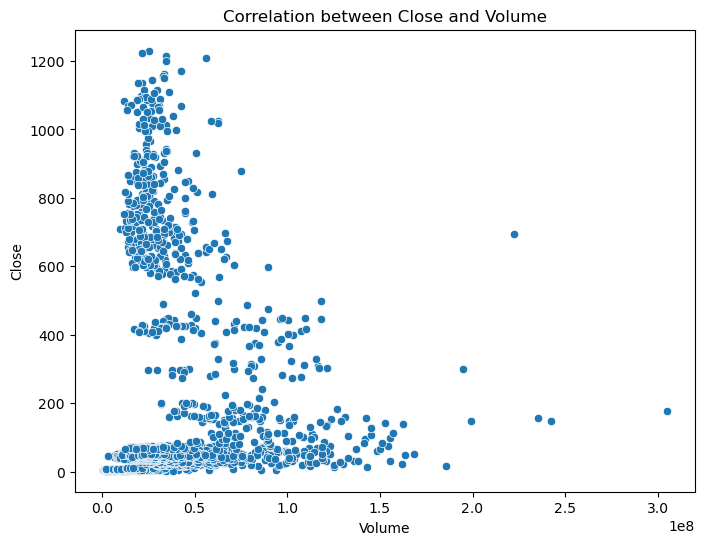

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

# Calculate the correlation coefficient between 'Close' and 'Volume' using the corr() method
correlation = df['Close'].corr(df['Volume'])

# Round the correlation coefficient to 4 decimal places
rounded_correlation = round(correlation, 4)

# Print the calculated correlation coefficient
print(f"Correlation between Close and Volume: {rounded_correlation}")

# Create a Seaborn scatter plot to visualize the correlation
# The Seaborn scatter plot helps visualize the correlation between the 'Close' and 'Volume' values. The 
# points in the scatter plot represent the relationship between these two variables, and the overall 
# pattern can indicate the strength and direction of the correlation.
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Volume', y='Close')
plt.title('Correlation between Close and Volume')
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

In [14]:
#Volume and Close Price Correlation using PyGWalker

#Load EDA Packages
import pandas as pd
import pygwalker as pyg

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/User/Documents/DataAnalyst/TESLA_Stock/TSLA_2010_2022.csv')

pyg.walk(df, dark='light')

Box(children=(HTML(value='<div id="ifr-pyg-5" style="height: auto">\n    <head>\n        <meta http-equiv="Con…

### Query 7. Insights for Volume and Close Price Correlation

The correlation coefficient value of 0.0906 suggests a very weak positive linear relationship between the closing   
prices and trading volumes of Tesla's stock. Here are some conclusions and insights that can be drawn from this   
correlation value:

**1. Weak Correlation:** A correlation coefficient close to 0 indicates that there is little to no linear relationship   
between the changes in closing prices and trading volumes. In this case, the value is positive, suggesting that as   
closing prices increase, trading volumes tend to increase slightly as well. However, the correlation is too weak to   
infer any strong connection between the two variables.

**2. Limited Predictive Power:** Since the correlation is weak, it implies that changes in trading volume are not a   
reliable predictor of changes in stock prices, and vice versa. Traders and investors should be cautious about using   
trading volume as a sole indicator for making investment decisions related to Tesla's stock.

**3. External Factors:** Factors beyond trading volume, such as company news, market sentiment, macroeconomic trends,   
and regulatory changes, likely play a more significant role in driving Tesla's stock price movements.

**4. Diverse Market Participants:** The weak correlation could be a result of various market participants with     
different motivations and strategies. Some investors might focus more on short-term price fluctuations, while others   
might prioritize long-term prospects, leading to varying trading behaviors.

**5. Further Analysis Needed:** While the correlation is weak overall, it's important to note that correlation does   
not imply causation. To gain a deeper understanding of the relationship between trading volume and stock prices,   
additional analyses and consideration of other factors would be necessary.

**__________________________________________________________________________________________________________________________________________________**